## Import Required Libraries

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

## Load the Data

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Drop first num col
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## EDA

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
df['color'].unique()


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
df['color'].value_counts()


color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [14]:
df['clarity'].value_counts()


clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

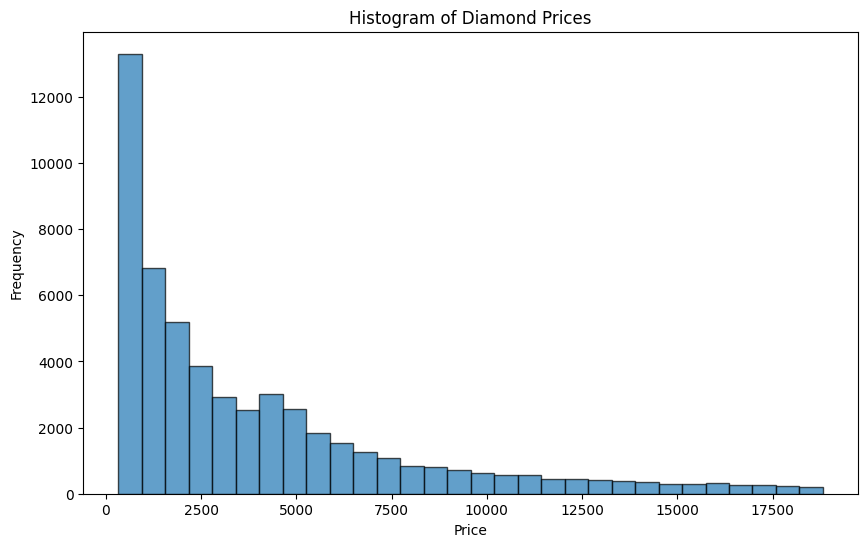

In [15]:
# Plot histogram of diamond prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

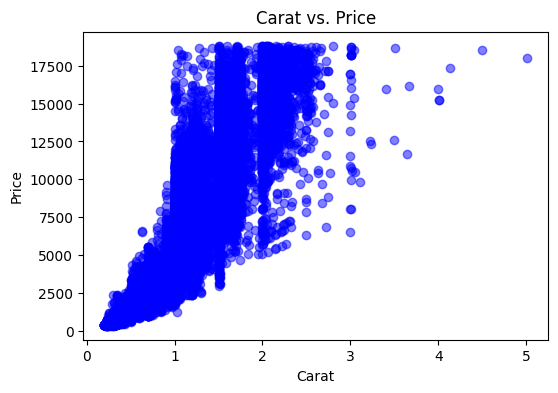

In [16]:
# Plot scatter plot of carat vs. price
plt.figure(figsize=(6, 4))
plt.scatter(df['carat'], df['price'], alpha=0.5, c='blue')
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


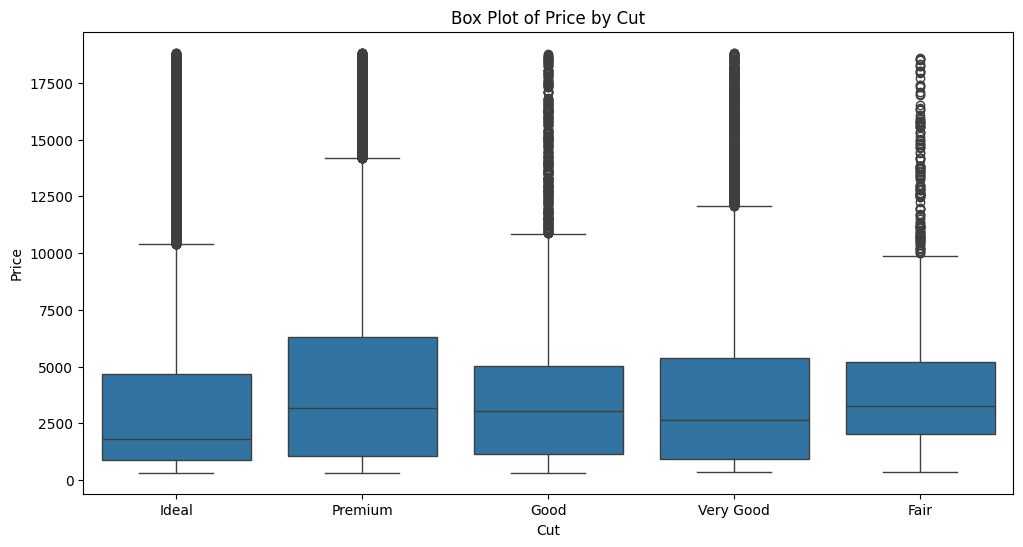

In [17]:
# Plot box plot of price by cut
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Box Plot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


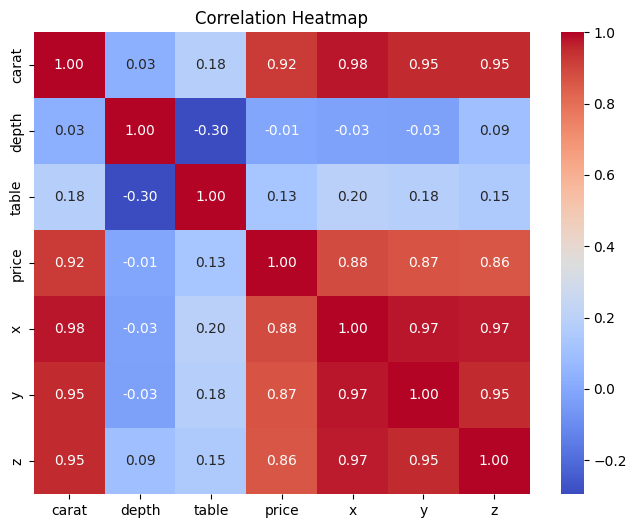

In [18]:
# Compute correlation matrix
correlation_matrix = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Use 10000 examples for training.

In [19]:
# df=df.head(10000)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler

# Ordinal encoding for categorical features
encoder = OrdinalEncoder(categories=[
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
])
df[['cut', 'color', 'clarity']] = encoder.fit_transform(df[['cut', 'color', 'clarity']])

## Data Splitting

In [22]:
# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [23]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Decision Tree Regressor model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
y_pred_dtr = dtr_model.predict(X_test)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)


# Random Forest Regressor model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred_rfr = rfr_model.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)


# XGBRegressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression MAE: {mae_lr}, R2: {r2_lr}")
print(f"Decision Tree Regressor MAE: {mae_dtr}, R2: {r2_dtr}")
print(f"Random Forest Regressor MAE: {mae_rfr}, R2: {r2_rfr}")
print(f"XGB Regressor MAE: {mae_xgb}, R2: {r2_xgb}")

Linear Regression MAE: 805.2743660189867, R2: 0.9056643685073511
Decision Tree Regressor MAE: 354.5546903967371, R2: 0.9655703038485016
Random Forest Regressor MAE: 266.02098588488974, R2: 0.9816497093554645
XGB Regressor MAE: 276.58800820593575, R2: 0.9811040570588873


## Save the best model

In [25]:
import pickle
with open('xgb_diamond_price_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)